In [1]:
# %reset

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import re
import warnings
import pprint
warnings.filterwarnings('ignore')
#import collections

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
class Invalid_Date_Exception(Exception):
    def __init__(self,msg):
        self._msg = msg
    def get_msg(self):
        return self._msg
    msg = property(get_msg)
    
        
class Invalid_Country_Exception(Exception):
    def __init__(self,msg):
        self._msg = msg
    def get_msg(self):
        return self._msg
    msg = property(get_msg)
        
class Invalid_Title_Exception(Exception):
    def __init__(self,msg):
        self._msg = msg
    def get_msg(self):
        return self._msg
    msg = property(get_msg)
class Invalid_N_Exception(Exception):
    def __init__(self,msg):
        self._msg = msg
    def get_msg(self):
        return self._msg
    msg = property(get_msg)
    
class Invalid_Category_Exception(Exception):
    def __init__(self,msg):
        self._msg = msg
    def get_msg(self):
        return self._msg
    msg = property(get_msg)


In [5]:
class Init:
    
    p = re.compile("Non-English")
    @staticmethod
    def init_category(category):
        return category.split("(")[0].strip()

    @staticmethod
    def init_eng(category):
        if Init.p.search(category):
            return False
        else: return True

class Show(Init):
    # 클래스 변수

    # title을 key로 들어가 있음
    show_info = dict()

    def __init__(self,title,season,category):
            
        self._title = title
        self._season = [season]
        self._category = Init.init_category(category)
        self._eng = Init.init_eng(category)


    # 같은 이름의 작품이 있는 경우 -> 해당 객체 리턴, 없는 경우 None 리턴
    @classmethod
    def find_title(cls,title):
        try:
            ret = cls.show_info[title.lower()]
        except KeyError:
            return None
        else:
            return ret

    @classmethod
    def add_season(cls,title,season,obj=None):
        try:
            if season not in cls.show_info[title].season:
                cls.show_info[title].season.append(season)
        except KeyError:
            cls.show_info[title] = obj

            
    def get_title(self):
        return self._title
    title = property(get_title)

    def get_season(self):
        return self._season
    season = property(get_season)

    def get_category(self):
        return self._category
    category = property(get_category)

    def get_eng(self):
        return self._eng
    eng = property(get_eng)

    @classmethod
    def add_show(cls,x,op):
    
        if op == 'C':
            title,season,category = x[4],x[5],x[2].lower()
        else:
            title,season,category = x[3],x[4],x[1].lower()
        
        dup = cls.find_title(title.lower())
        if not dup:
            obj = Show(title,season,category)
            cls.add_season(title.lower(),season,obj)
    
    @classmethod
    def print_show(cls):
#         print(Show.show_info)
        for k,v in cls.show_info.items():
            print(v.title,end=" ")
            if v.season[0] != 'No season title':
                print(v.season)
    
        



# 데이터 초기화

In [6]:
# func5()

In [7]:
gdata = pd.read_csv("all-weeks-global.csv")


In [8]:
gdata = gdata.drop(columns=["cumulative_weeks_in_top_10"])


In [9]:
gdata = gdata.fillna("No season title")


In [10]:
gdata["season_title"] = gdata["season_title"].apply(lambda x : re.sub(".*: ","",x))
# cdata["season_title"]
# season_title에 show_title과 이름이 중복되는 부분 제거


In [11]:
gdata.rename(columns={"weekly_rank" : "rank"},inplace=True)
# gdata
# cdata['category']=
tmp = gdata.apply(lambda x : Show.add_show(x,'D'), axis=1)


In [12]:
cdata = pd.read_csv("all-weeks-countries.csv")

In [13]:
cdata = cdata.drop(columns = {"country_iso2","cumulative_weeks_in_top_10"})

In [14]:
cdata.rename(columns={"weekly_rank" : "rank"},inplace=True)


In [15]:
cdata = cdata.fillna("No season title")


In [16]:
cdata["season_title"] = cdata["season_title"].apply(lambda x : re.sub(".*: ","",x))

# cdata["season_title"].apply(lambda x : print(x,len(x)))
# season_title에 show_title과 이름이 중복되는 부분 제거


In [17]:

tmp = cdata.apply(lambda x : Show.add_show(x,'C'), axis=1)


In [18]:
cdata['category']=cdata['category'].apply(lambda x:x.replace(" (English)",""))


In [19]:
country_list = cdata.drop_duplicates('country_name')["country_name"]
country_list = country_list.reset_index().drop(columns = "index")
country_list = list(country_list["country_name"])


In [20]:
title_list = cdata.drop_duplicates('show_title')["show_title"]
title_list = title_list.reset_index().drop(columns = "index")
title_list = list(title_list["show_title"])


# 함수 선언

In [21]:
# 시즌 여러개 인 경우 추가로 입력 받아야 함
def is_invalid_title(title,found):

    if title == "":
        return True
    title = title.strip()
    find = Show.find_title(title)
    season = ""
    if find:
        if len(find.season) > 1:
            while True:
                for k,v in enumerate(find.season):
                    print(f"{k} : {v}")
                try:
                    op = int(input("season을 골라주세요 : "))
                except ValueError as E:
                    print("다시 입력해주세요 ")
                else:
                    season = find.season[op]
                    break
        else:
            season = find.season[0]
        p = re.compile(title,re.I)  #대소문자 구분 X
        for t in title_list:
            if p.search(t):
                found.append(t)
        found.append(season)
        return False
    else:
        print("검색하신 작품이 목록에 없습니다.")      
    return True           
   
    


# f = []
# is_invalid_title("  Squid game ",f)
# f



In [22]:
def show_result(title,country,start,end,res):
    
    # plt.rcParams['figure.figsize'] = (15,7)
    # fig,ax1 = plt.subplots()

    plt.figure(figsize=(15,7))
    sz = res["week"].size-1
    if sz == -1:
        print("입력한 기간내 순위 정보가 존재하지 않습니다.")
        return
        
    start = max(res["week"].reset_index().loc[sz]["week"],start)
    end = min(res["week"].reset_index().loc[0]["week"],end)

    
    x = res["week"].apply(lambda x :"{0}-{1}".format(*x.split("-")[1:]))
    y = res["rank"]
    
    plt.title(f"\n{title} rank in {country} from {start} to {end}\n")
    # plt.plot(x,y,"bo-")
    plt.xlabel("week")
    plt.ylabel("rank")
    plt.ylim([0.5,10.5])
    plt.yticks([i for i in range(1,11)])
    plt.plot(x,y,"bo-")


    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()




    plt.show()


In [23]:
def is_invalid_date(date):
    
    p = re.compile("\d{4}[-]\d+[-]\d+")
    m,d = map(int,date.split("-")[1:])
    if not p.match(date) or m >= 13 or m<1 or d>31 or d<1 :
        return True

    return False

# is_invalid_date("2012-12-32")
# is_invalid_date("2012-13-12")


In [24]:
# 양쪽 공백만 수정 대소문자 추가 할지 말지 고민 중
def is_invalid_country(country):
    
    countries = " ".join(country_list)
    for c in country.split(","):
        p = re.compile(c.strip())
        if not p.search(countries):
            print("검색하신 나라가 Netflix 이용국이 아닙니다.")
            return True

    return False
# is_invalid_country("     South Korea    ,    Japan ")

In [25]:
def is_invalid_N(N):
    N = int(N)
    return not(N>=1 and N<=10)


In [26]:
def is_invalid_category(category):
    category = category.lower()
    if category == "tv" or category == "films":
        return False
    return True

# is_invalid_category("Tv")

In [27]:
def get_input(query):
    
    ret = []
    country = category = title = ""
    print("------------------------------------------------------------")
    if query ==1 or query == 2: 
        country = input("검색한 작품의 순위가 궁금한 나라를 입력해주세요 ex) South Korea, Japan : ")
    start = input("검색할 기간의 처음 날짜를 입력해주세요 ex) YYYY-MM-DD : ")
    end = input("검색할 기간의 마지막 날짜를 입력해주세요 ex) YYYY-MM-DD : ")
    if query == 1:
        N = input("몇 위까지 검색할지 입력해주세요(1~10) : ")
        category = input("TV or Films : ")
    elif query == 2 or query == 3:
        title = input("검색할 작품 이름을 입력하세요 : ")
    print("------------------------------------------------------------")

    found = []
    if is_invalid_date(start) or is_invalid_date(end):
        raise Invalid_Date_Exception("날짜는 YYYY-MM-DD 형식으로 입력해주세요")
    elif len(country)>0 and is_invalid_country(country):
        raise Invalid_Country_Exception("나라 이름은 영어로 입력해주세요")
    elif query != 1 and is_invalid_title(title,found):
        raise Invalid_Title_Exception("검색할 작품은 반드시 입력해주세요")
    elif query == 1 and is_invalid_N(N):
        raise Invalid_N_Exception("1과 10사이의 정수를 입력해주세요")
    elif query == 1 and is_invalid_category(category):
        raise Invalid_Category_Exception("TV 혹은 Films를 입력해주세요")
    else:
        if query != 3:
            if len(country) == 0: country = country_list
            else: country = country.split(", ")
            ret.append(country)
        ret.extend([start,end])
        if query == 1:
#             N = int(N)
            ret.extend([N,category])
        else:
            title,season = found
            ret.extend([title,season])
        return ret

# 1. 특정 기간 동안 나라별 top-N (TV, Film 구분)

In [28]:
def query1(start,end,country,N,category):
    print()
    for c in country:
        res1 = cdata.loc[(cdata["rank"] <= N ) & (cdata["country_name"] == c) &(cdata["week"]>=start) & (cdata["week"]<=end) & (cdata["category"]==category)]
        ret = pd.DataFrame(res1,columns=["week","rank","show_title","season_title"])
        print(f"In {c}")
        for k,v in enumerate(ret.values.tolist()):
            if k % N == 0:
                print(v[0])
#             season 정보가 있는 경우 출력
            to = 4 if v[3] != "No season title" else 3
            pprint.pprint(v[1:to])
        print()

In [29]:
def func1():
    print("'21.07.04 ~ '21.11.14 사이의 순위 정보를 보여줍니다.")

    while True:
        try:
            country,start,end,N,category= get_input(1)
        except Invalid_Date_Exception as e:
            print(e.msg)
        except Invalid_Country_Exception as e:
            print(e.msg)
        except Exception as e:
            print("다시 입력해주세요",e.args)
        else:
            query1(start,end,country,int(N),category)
            break
            

# func1()

# 2. 특정 기간 동안 특정 작품의 나라별 순위


In [30]:
def query2(title,season,start,end ,country=country_list):
    res2 = cdata.loc[(cdata["week"]>=start) & (cdata["week"]<=end) & (cdata["show_title"]==title) & (cdata["season_title"] == season)]    
    for c in country:
        tmp2 = res2.loc[res2["country_name"] == c]
        ans2 = pd.DataFrame(tmp2,columns = ["week","rank"])
        show_result(title,c,start,end,ans2)
        if len(ans2["rank"]) != 0: print(f"{c}에서 {start} ~ {end}동안 {title} 평균 순위 : {sum(ans2['rank'])/len(ans2['rank']):.2f}")


In [31]:
def func2():
    print("'21.07.04 ~ '21.11.14 사이의 순위 정보를 보여줍니다.")
    print("해당 기간동안 순위가 10보다 작은 경우만 보여줍니다.")
    while True:
        try:
            country,start,end,title,season = get_input(2)
        except Invalid_Date_Exception as e:
            print(e.msg)
        except Invalid_Country_Exception as e:
            print(e.msg)
        except Invalid_Title_Exception as e:
            print(e.msg)
        except Exception as e:
            print("다시 입력해주세요")
        else:
            query2(title,season,start,end,country)
            break
            
        

# 3. 특정 기간 동안 특정 작품의 전세계 순위

In [32]:
def show_views(start,end,title,info):
    
    
    plt.figure(figsize=(15,7))
    sz = info["week"].size-1
    if sz == -1:
        print("입력한 기간내 순위 정보가 존재하지 않습니다.")
        return
        
    start = max(info["week"].reset_index().loc[sz]["week"],start)
    end = min(info["week"].reset_index().loc[0]["week"],end)

    plt.title(f"\n{title} from {start} to {end}\n")
    plt.xlabel("week")
    plt.ylabel("weekly_hours_viewed")
    
    plt.plot(info["week"].apply(lambda x :"{0}-{1}".format(*x.split("-")[1:])),info["weekly_hours_viewed"],"-s",color = 'g',markersize=7,linewidth=5,alpha=0.7)
    plt.bar(info["week"].apply(lambda x :"{0}-{1}".format(*x.split("-")[1:])),info["weekly_hours_viewed"])
    plt.gca().invert_xaxis()
    plt.show()


In [33]:
# cdata["week"].apply(lambda x :"{0}-{1}".format(x.split("-")[1:]))
# s = "2021-07-12"
# # lambda x :"{0}-{1}".format(x.split("-")[1:])
# t = s.split("-")
# print("{0} {1} {2}".format(*t))


In [34]:
def query3(start,end,title,season):
    res = gdata.loc[(gdata["week"]>=start) & (gdata["week"]<=end) & (gdata["show_title"]==title) & (gdata["season_title"]==season)]    
    ans = pd.DataFrame(res,columns = ["week","rank"])
    show_result(title,"world",start,end,ans)
    view_info = pd.DataFrame(res,columns=["week","weekly_hours_viewed"])
    show_views(start,end,title,view_info)

# query3("2021-10-12","2021-11-14","Squid Game","Season 1")

In [35]:
def func3():
    print("'21.07.04 ~ '21.11.14 사이의 순위 정보를 보여줍니다.")
    print("해당 기간동안 순위가 10보다 작은 경우만 보여줍니다.")
    while True:
        try:
            start,end,title,season = get_input(3)
        except Invalid_Date_Exception as e:
            print(e.msg)
        except Invalid_Title_Exception as e:
            print(e.msg)
        except Exception as e:
            print("다시 입력해주세요",e.args)
        else:
            query3(start,end,title,season)
            break
            

# func3()

In [36]:
def func4():
    print(f"\n{len(country_list)}개국의 나라가 Neflix를 이용중입니다.\n")

    pp = pprint.PrettyPrinter(width = 95,compact=True)
    pp.pprint(country_list)

# func4()

In [37]:
def func5():
    Show.print_show()
# func5()

In [38]:
def seperate(func):
    def new_func():
        print("-"*43)
        func()
        print("-"*43)
    return new_func

@seperate
def display():
    

    print("# 1 : 특정 기간 동안 나라별 top-N           ")
    print("# 2 : 특정 기간 동안 특정 작품의 나라별 순위 ")
    print("# 3 : 특정 기간 동안 특정 작품의 전세계 순위 ")
    print("# 4 : Netflix 이용국 출력 ")
    print("# 5 : 검색 가능한 Neflix 작품 리스트 출력 ")
    print("# 0 : 종료 ")
    
    
def choose_and_call():
    op = int(input("원하는 기능을 입력하세요: "))
    if op == 0:
        print("프로그램 종료합니다.")             
        return False
    if op== 1:
        func1()
    elif op == 2:
        func2()
    elif op == 3:
        func3()
    elif op == 4:
        func4()
    elif op == 5:
        func5()
    else:
        print("Not yet implemented")
    return True

# display()

# Main

-------------------------------------------
# 1 : 특정 기간 동안 나라별 top-N           
# 2 : 특정 기간 동안 특정 작품의 나라별 순위 
# 3 : 특정 기간 동안 특정 작품의 전세계 순위 
# 4 : Netflix 이용국 출력 
# 5 : 검색 가능한 Neflix 작품 리스트 출력 
# 0 : 종료 
-------------------------------------------
원하는 기능을 입력하세요: 1
'21.07.04 ~ '21.11.14 사이의 순위 정보를 보여줍니다.
------------------------------------------------------------
검색한 작품의 순위가 궁금한 나라를 입력해주세요 ex) South Korea, Japan : South Korea
검색할 기간의 처음 날짜를 입력해주세요 ex) YYYY-MM-DD : 2021-10-01
검색할 기간의 마지막 날짜를 입력해주세요 ex) YYYY-MM-DD : 2021-11-01
몇 위까지 검색할지 입력해주세요(1~10) : 3
TV or Films : TV
------------------------------------------------------------

In South Korea
2021-10-31
[1, 'My Name', 'Season 1']
[2, 'Squid Game', 'Season 1']
[3, 'Hometown Cha-Cha-Cha', 'Season 1']
2021-10-24
[1, 'My Name', 'Season 1']
[2, 'Hometown Cha-Cha-Cha', 'Season 1']
[3, 'Squid Game', 'Season 1']
2021-10-17
[1, 'Hometown Cha-Cha-Cha', 'Season 1']
[2, 'My Name', 'Season 1']
[3, 'Squid Game', 'Season 1']
2021-10-10
[1, 'Squid Ga

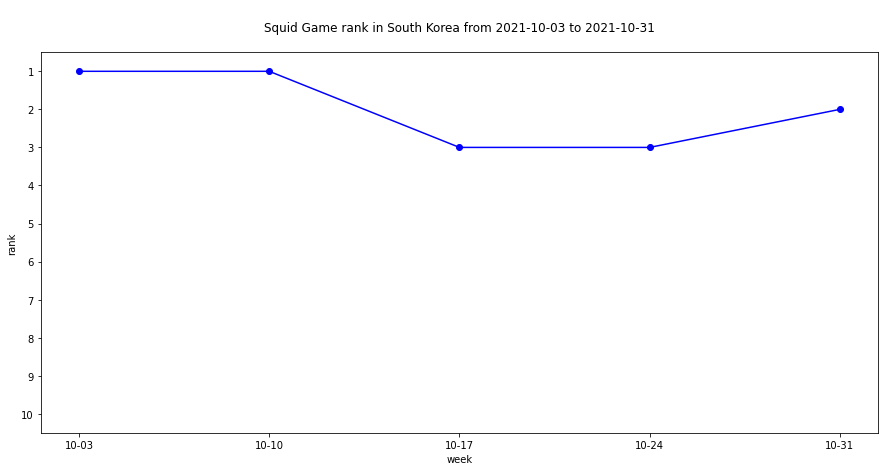

South Korea에서 2021-10-01 ~ 2021-11-01동안 Squid Game 평균 순위 : 2.00
-------------------------------------------
# 1 : 특정 기간 동안 나라별 top-N           
# 2 : 특정 기간 동안 특정 작품의 나라별 순위 
# 3 : 특정 기간 동안 특정 작품의 전세계 순위 
# 4 : Netflix 이용국 출력 
# 5 : 검색 가능한 Neflix 작품 리스트 출력 
# 0 : 종료 
-------------------------------------------
원하는 기능을 입력하세요: 3
'21.07.04 ~ '21.11.14 사이의 순위 정보를 보여줍니다.
해당 기간동안 순위가 10보다 작은 경우만 보여줍니다.
------------------------------------------------------------
검색할 기간의 처음 날짜를 입력해주세요 ex) YYYY-MM-DD : 2021-10-01
검색할 기간의 마지막 날짜를 입력해주세요 ex) YYYY-MM-DD : 2021-11-01
검색할 작품 이름을 입력하세요 : Squid Game
------------------------------------------------------------


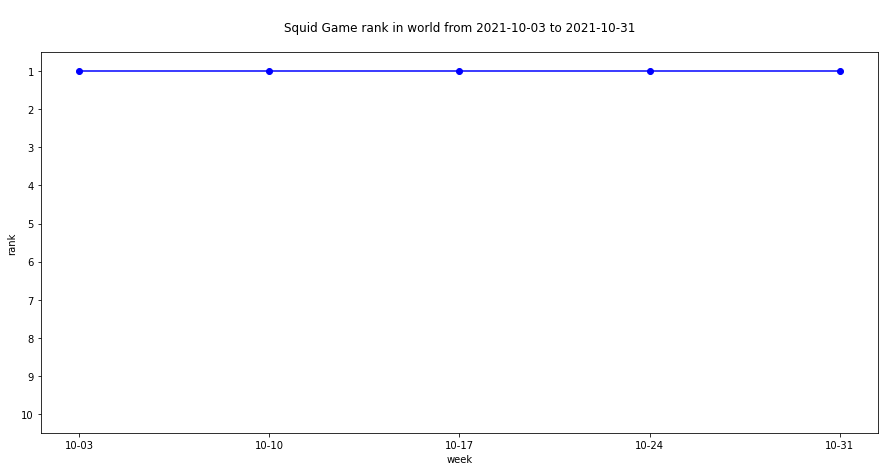

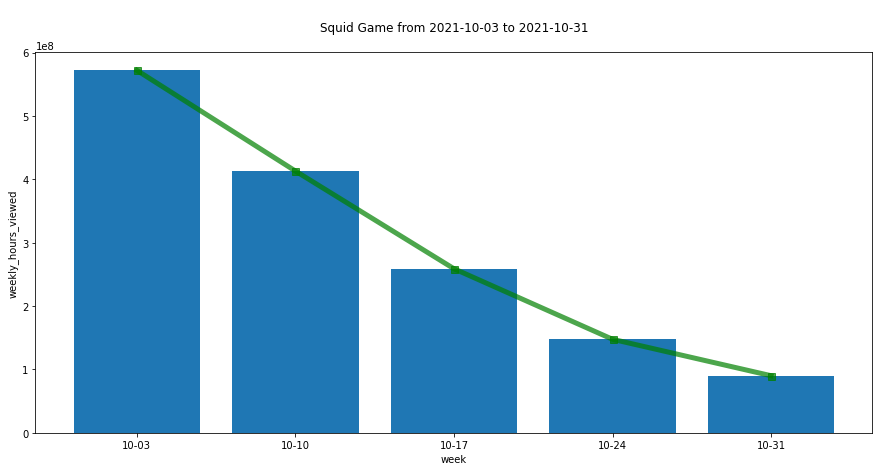

-------------------------------------------
# 1 : 특정 기간 동안 나라별 top-N           
# 2 : 특정 기간 동안 특정 작품의 나라별 순위 
# 3 : 특정 기간 동안 특정 작품의 전세계 순위 
# 4 : Netflix 이용국 출력 
# 5 : 검색 가능한 Neflix 작품 리스트 출력 
# 0 : 종료 
-------------------------------------------
원하는 기능을 입력하세요: 4

94개국의 나라가 Neflix를 이용중입니다.

['Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia',
 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Guadeloupe', 'Guatemala', 'Honduras',
 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mexico', 'Morocco',
 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Nigeria', 'No

Tughlaq Durbar (Telugu) Roohi Into the Storm Comedy Premium League ['Season 1']
Boomika The Devil's Advocate Itaewon Class ['Season 1']
Acts of Violence Start-Up ['Season 1']
Molly's Game Pandemic Dignitate Impetigore A World Without Twivortiare: Is It Love? Habibie & Ainun 3 The Last Witch Hunter Peppermint Mad Dog Colombiana Dragon Sicario Couple on the Backtrack Laundry Show Taken Now You See Me 2 Bleeding Steel Man in Love Sultan Agung: Throne, Rebellion, and Love Soekarno You Are My Spring ['Season 1']
Nur ['Season 1']
The Hitman’s Bodyguard Racket Boys ['Season 1']
Ali & Ratu Ratu Queens Law School ['Season 1']
Deck the Halls Pretty Little Liars ['Season 1']
Out of Death Ransom Dark Waters The Next Three Days Falling for Figaro The First Wives Club Hotel Transylvania Luce Spider-Man 3 Shazam! Office Christmas Party Bad Sport ['Volume 1']
The Amazing Spider-Man Pain & Gain Papillon Django Unchained Shot Caller The Blind Side Fear of Rain Something's Gotta Give The LEGO Movie 2: Th

Replicas Home Apocalypse Now Redux Reprisal Scary Movie 4 In the Dark ['Season 3']
Something Borrowed Jumanji Gladiator The DUFF Step Brothers Till Death An Unfinished Life Wind River The Paper Tigers The Net Poms Talladega Nights: The Ballad of Ricky Bobby The Best of Enemies Bureau of Magical Things ['Season 1']
Dog Gone Trouble Rebelde Way ['Temporada 1']
Her Mother's Killer ['Season 1']
Surviving Escobar - Alias JJ ['Season 1']
Camellia Sisters Space Sweepers The Merciless Vagabond ['Season 1']
The Berlin File Honest Thief Let Hoi Decide Sweet 20 The Gunman The Legend of Mi Yue ['Season 1']
Descendants of the Sun ['Season 1']
The Fiery Priest Dreamy Eyes My Mr. Wife Glitch -------------------------------------------
# 1 : 특정 기간 동안 나라별 top-N           
# 2 : 특정 기간 동안 특정 작품의 나라별 순위 
# 3 : 특정 기간 동안 특정 작품의 전세계 순위 
# 4 : Netflix 이용국 출력 
# 5 : 검색 가능한 Neflix 작품 리스트 출력 
# 0 : 종료 
-------------------------------------------
원하는 기능을 입력하세요: 0
프로그램 종료합니다.


In [40]:
while True:
    
    display()
    if not choose_and_call():
        break

    

## 

## 